#### Week-5

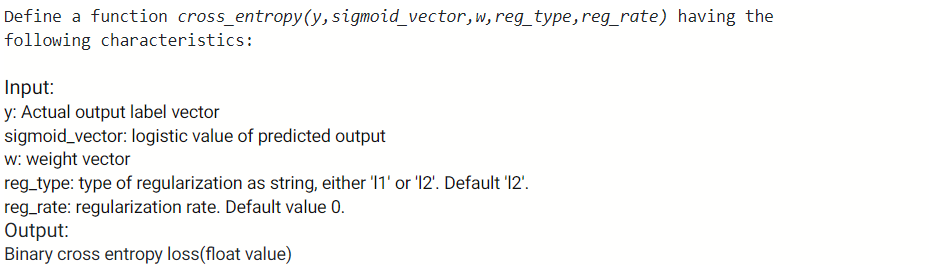

In [1]:
import numpy as np
def cross_entropy(y,sigmoid_vector,w,reg_type='l2',reg_rate=0):
	loss_orig = -1 * np.sum(y * np.log(sigmoid_vector) + (1 - y) * np.log(1 - sigmoid_vector))
	if reg_type == "l2":
		reg = reg_rate * np.dot(w.T, w)
	else:
		reg = reg_rate * np.sum(abs(w))
	return loss_orig + reg

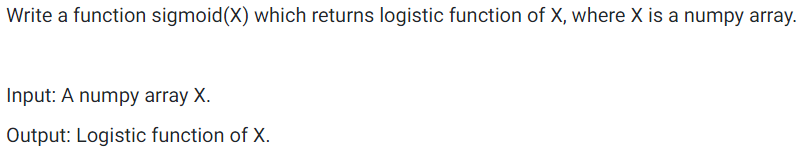

In [2]:
import numpy as np
def sigmoid(X):
    sig = 1/(1+np.exp(-X))
    return sig

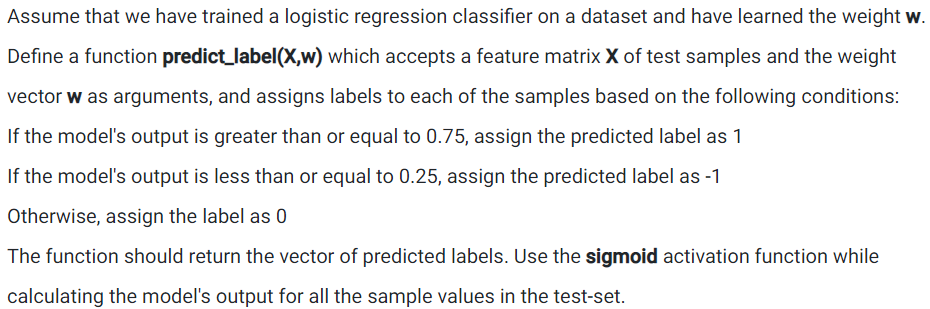

In [3]:
import numpy as np
def linear_combination(X, w):
    return X @ w
	
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
	
def activation(X, w):
    return sigmoid(linear_combination(X, w))
	
def predict_label(X, w):
    labels = np.where(activation(X, w) >= 0.75, 1, np.where(activation(X, w) <= 0.25, -1, 0))
    return labels

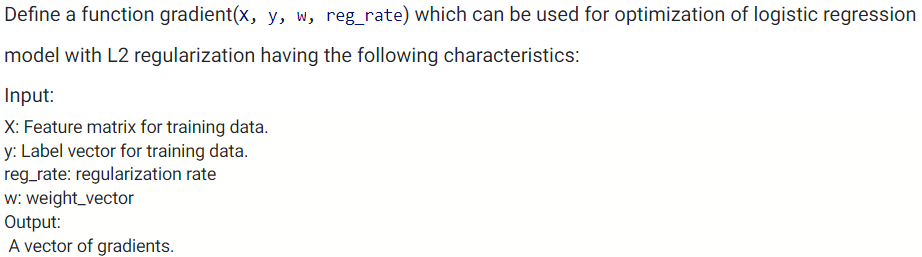

In [4]:
import numpy as np
def gradient(X,y,w,reg_rate):
    sigmoid_vector = 1 / (1 + np.exp(-X@w))
    G = X.T @ (sigmoid_vector - y) + reg_rate * w
    return G

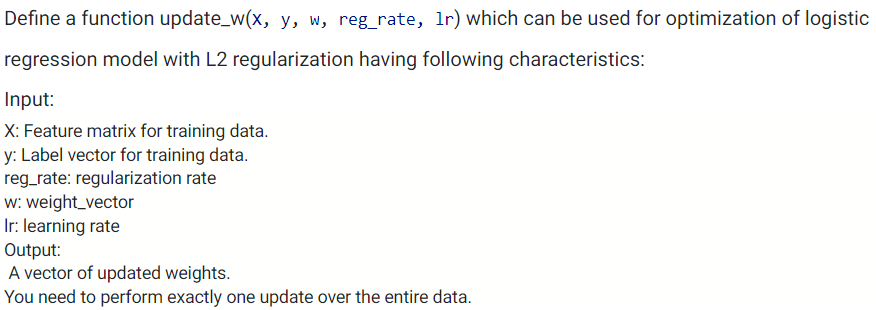

In [5]:
import numpy as np
def calculate_gradient(X, y, w, reg_rate):
    sigmoid_vector = 1 / (1 + np.exp(-X@w))
    return X.T @ (sigmoid_vector - y) + reg_rate * w
	
def update_w(X, y, w, reg_rate, lr):
    return w - calculate_gradient(X, y, w, reg_rate) * lr

#### Week-6

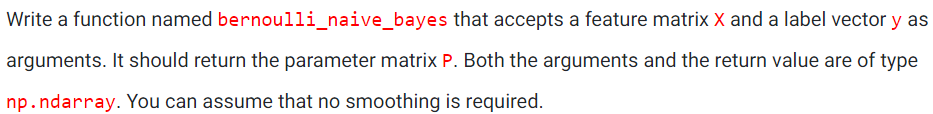

In [6]:
import numpy as np
def bernoulli_naive_bayes(X, y):
    _classes = np.unique(y)
    n_classes = len(np.unique(y))
    n_samples, n_features = X.shape
    p = np.zeros((n_classes, n_features))
    
    for c in _classes:
        X_c = X[y == c]
        p[c - 1, : ] = (np.sum(X_c, axis=0))/(X_c.shape[0])
#         p[:, c - 1] = (np.sum(X_c, axis=0))/(X_c.shape[0])
    return p.T
#     return p

In [7]:
X = np.array([[1,0],[0,0],[0,1],[1,0]])
y = np.array([1,2,2,2])
bernoulli_naive_bayes(X,y)

array([[1.        , 0.33333333],
       [0.        , 0.33333333]])

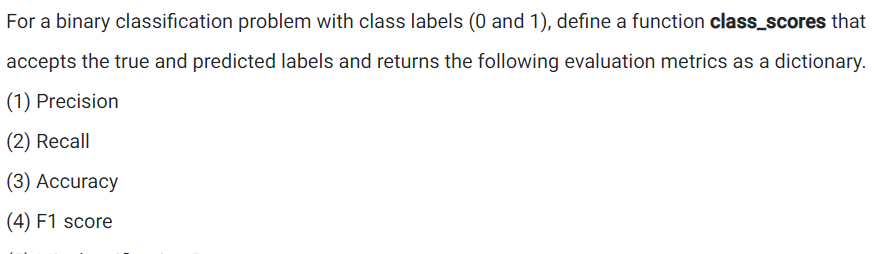

In [8]:
import numpy as np
def class_scores (y_test, y_pred) :
    tp = np.where((y_test == 1) & (y_pred == 1), 1, 0).sum()
    tn = np.where((y_test == 0) & (y_pred == 0), 1, 0).sum()
    fp = np.where((y_test == 0) & (y_pred == 1), 1, 0).sum()
    fn = np.where((y_test == 1) & (y_pred == 0), 1, 0).sum()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    misclassification_rate = 1 - accuracy
    return {"precision": precision, "recall": recall, "accuracy": accuracy,
           "f1_score": f1_score, "misclassification_rate": misclassification_rate}

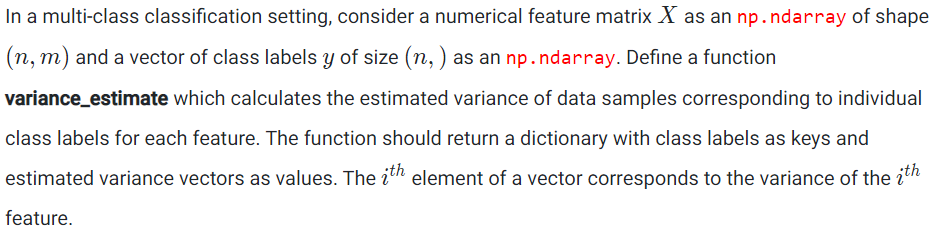

In [9]:
import numpy as np
def variance_estimate(X: np.ndarray,  y: np.ndarray):
    D = {}
    labels = np.unique(y)
    for label in labels:
        D[label] = np.var(X[y == label], axis = 0)
    return D

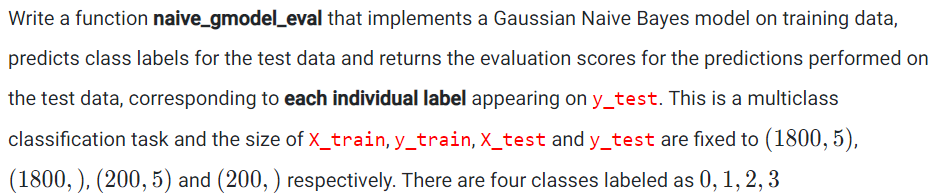

In [10]:
import numpy as np
def class_scores(y_test, y_pred, positive):
    tp = np.sum((y_test == positive) & (y_pred == positive))
    tn = np.sum((y_test != positive) & (y_pred != positive))
    fp = np.sum((y_test != positive) & (y_pred == positive))
    fn = np.sum((y_test == positive) & (y_pred != positive))

    names = ("Precision", "Recall","Accuracy", "Misclassification Rate","F1 score")
    values = [tp / (tp + fp), tp / (tp + fn), (tp + tn) / (tp + tn + fp + fn)]
    values.append(1 - values[-1])
    values.append(2 * values[0] * values[1] / (values[0] + values[1]))

    scores = dict(zip(names,values))
    return scores

# Solution
class NB(object):

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype = np.float64)
        self._var = np.zeros((n_classes, n_features), dtype = np.float64)
        self._priors = np.zeros(n_classes, dtype = np.float64)

        for c in self._classes:
            X_c = X[y == c]
            self._mean[c, :] = X_c.mean(axis = 0)
            self._var[c, :] = X_c.var(axis = 0)
            self._priors[c] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        self._posterior = np.zeros((X.shape[0], len(self._classes)), dtype = np.float64)
        for idx, x in enumerate(X):
            for c in self._classes:
                self._posterior[idx, c] = np.log(self._pdf(c, x)) + np.log(self._priors[c])
        return np.argmax(self._posterior, axis = 1)

    def _pdf(self, class_idx, X):
        mean = self._mean[class_idx]
        var = np.diag(self._var[class_idx])
        z = np.power(2 * np.pi, X.shape[0]/2) * np.power(np.linalg.det(var), 1/2)
        return (1 / z) * np.exp(-(1 / 2) * (X - mean).T @ (np.linalg.inv(var)) @ (X - mean))

def naive_gmodel_eval(X_train, y_train, X_test, y_test):
    gaussian_nb = NB()
    gaussian_nb.fit(X_train, y_train)
    y_pred = gaussian_nb.predict(X_test)

    labels = np.unique(y_train)
    D = {}
    for label in labels:
        D[label] = class_scores(y_test, y_pred, label)
    return D

#### Week-7

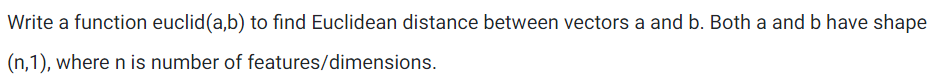

In [11]:
import numpy as np
def euclid(a, b):
    E = np.sum((a - b) ** 2, axis=1)
    return E

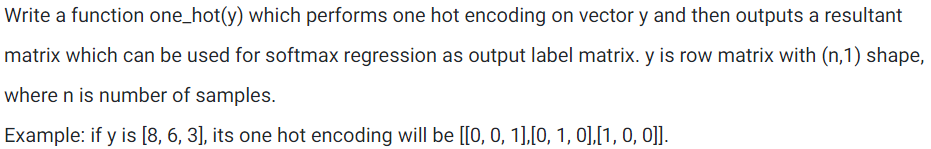

In [12]:
def one_hot(y):
    y_unique = np.unique(y)
    size = len(y_unique)

    enc = np.zeros((len(y),size))

    for i in range(len(y)):
        idx = np.where(y_unique == y[i])
        enc[i, idx] = 1
    return enc

In [13]:
y = np.array([8,6,3])
one_hot(y)

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

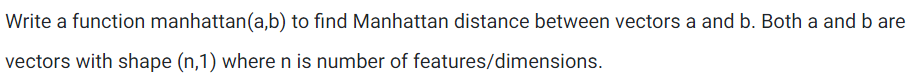

In [14]:
import numpy as np
def manhattan(a, b):
    E = np.sum(abs(a - b))
    return E

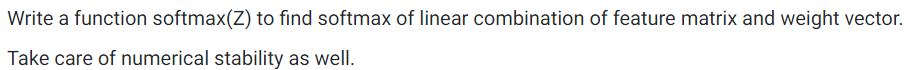

In [15]:
import numpy as np

def softmax(z):
    # subtracting max of z for numerical stability
    exp = np.exp(z - np.max(z))
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
    
    return exp

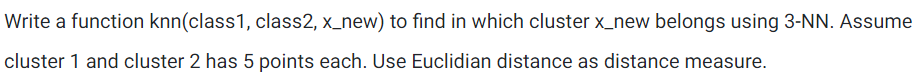

In [16]:
import numpy as np
from scipy import stats
def EuclideanDistance(x1, x2):
    return np.sum((x1 - x2) ** 2, axis=1)
    
def knn(class1, class2, newExample):
    X = np.row_stack((class1, class2))
    y = np.array([1,1,1,1,1,2,2,2,2,2])
    distance_vector = EuclideanDistance(X, newExample.reshape(1,2))
    k_nearest_neighbors_indices = np.argpartition(distance_vector, 3)[:3]
    k_nearest_neighbors = y[k_nearest_neighbors_indices]
    cluster = stats.mode(k_nearest_neighbors)[0]
    return cluster

#### Week-8

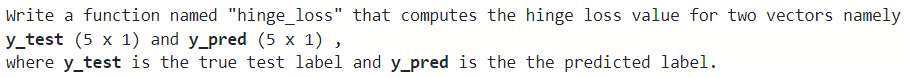

In [17]:
import numpy as np
def hinge_loss(y_test, y_pred):
    return np.mean([max(0, 1 - x * y) for x, y in zip(y_test, y_pred)])

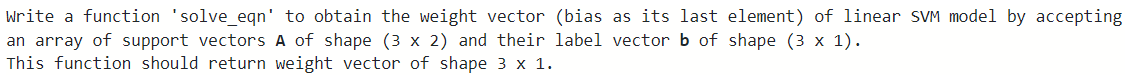

In [18]:
import numpy as np
def solve_eqn(A,b):
    A = np.array(A)
    b = np.array(b)
    X = np.column_stack((A,np.ones(len(A))))
    w = np.linalg.solve(X,b)
    return w

In [19]:
A = [[8, 3], [-4, 7], [3, 4]]
b = [ 1,-1 ,1]
solve_eqn(A, b)

array([-0.25, -1.25,  6.75])

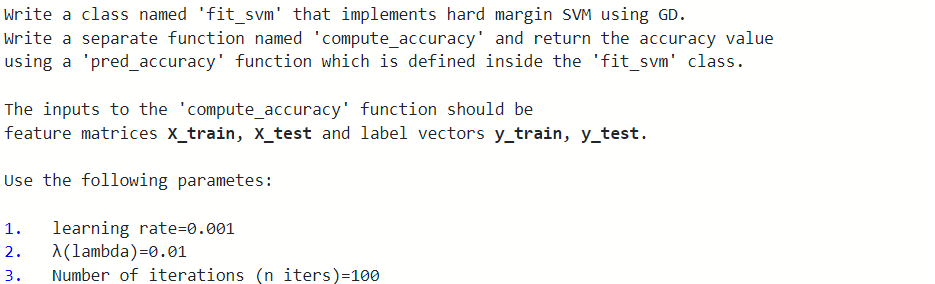

In [20]:
import numpy as np
class fit_svm:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    #Set self.lambda_param for fit without regularlization
    def fit(self, X, y):
        n_sample, n_features = X.shape
        y_ = np.where(y <= 0 ,-1, 1)
        self.w = np.zeros(n_features)
        self.b = 0
      
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i,self.w) - self.b) >= 1 #y * (w.x -b ) >=1 
                if condition:
                    self.w -= self.lr * ( 2 * self.lambda_param * self.w) #w = w - (lr*2*lambda*w)
                else:
                    self.w -= self.lr * ( 2* self.lambda_param * self.w - np.dot(x_i,y_[idx]))
                    self.b -= self.lr * y_[idx]
      
    def predict(self, X):
        val = X @ self.w - self.b
        return np.sign(val)
        
    def pred_accuracy(self, X, Y):
        approx = np.dot(X, self.w) - self.b
        y_pred=np.sign(approx)

        accuracy = np.sum(y_pred == Y)/X.shape[0]
        return accuracy

def compute_accuracy(X_train, y_train, X_test,  y_test):
    svm = fit_svm()
    svm.fit(X_train, y_train)
    return svm.pred_accuracy(X_test,  y_test)

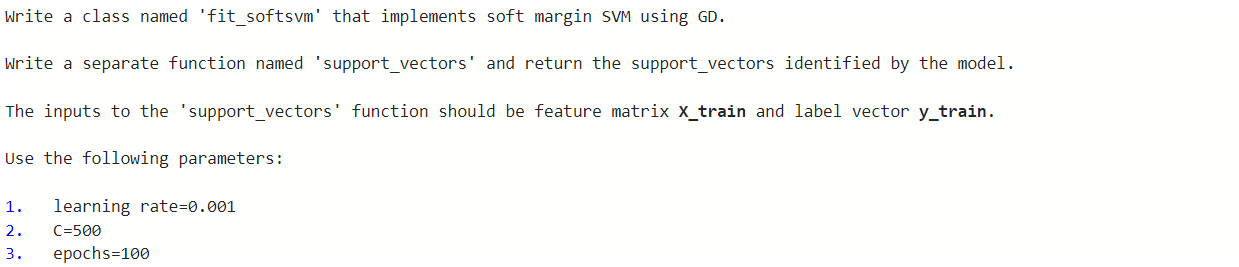

In [21]:
import numpy as np
class fit_softsvm:
    def __init__(self, C=500):
        self._support_vectors = None
        self.C = C
        self.w = None
        self.b = None
 
    def __cost(self, margin):
        return (1 / 2) * self.w.dot(self.w) + self.C * np.sum(np.maximum(0, 1 - margin))
 
    def __decision_function(self, X):
        return X.dot(self.w) + self.b
        
    def __margin(self, X, y):
        return y * self.__decision_function(X)
 
    def fit(self, X, y, lr=0.001, epochs=100):
        n, d = X.shape
        self.w = np.random.randn(d)
        self.b = 0
 
        loss_array = []
        for _ in range(epochs):
            margin = self.__margin(X, y)
            loss = self.__cost(margin)
            loss_array.append(loss)
 
            misclassified_pts_idx = np.where(margin < 1)[0]
            d_w = self.w - self.C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
            self.w = self.w - lr * d_w
 
            d_b = - self.C * np.sum(y[misclassified_pts_idx])
            self.b = self.b - lr * d_b
 
        self._support_vectors = np.where(self.__margin(X, y) <= 1)[0]
    
    def score(self, X, y):
        P = self.predict(X)
        return np.mean(y == P)

def support_vectors(X_train, y_train, X_test, y_test):
    svm = fit_softsvm()
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test,  y_test)
    return svm._support_vectors, accuracy

#### Week-9

Consider a regression problem with feature matrix X with size (100, 10) and label vector y with size (100, 1). We split this root node into two nodes 'node1' and 'node2' according to jth split variable and split value 's'.
Define a function `predict_node(X, y, j, s)` that takes X, y, split variable j and split value s as parameters and returns the tuple of predict values (mean value) at both the nodes.

In [22]:
import numpy as np
def predict_node(X, y, j, s):
    node1, k = 0, 0;
    node2, l = 0, 0
    for i in range(len(X)):
        if X[i][j] <= s:
            node1 += y[i][0]
            k += 1
        else:
            node2 += y[i][0]
            l += 1
    return (node1/k, node2/l)

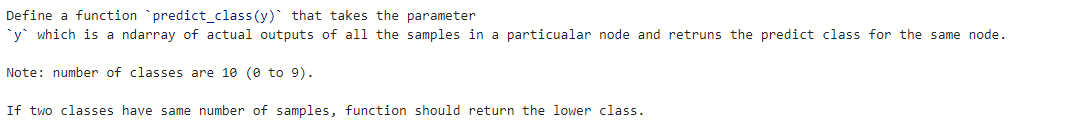

In [23]:
import numpy as np
def predict_class(y):
    return np.bincount(y).argmax()

Define a function `misclassification_error(y)`  that takes the parameter `y` which is a ndarray of actual outputs of all the samples in a particular node and return the misclassification error of the same node.

In [24]:
def misclassification_error(y):
    predict = max(np.bincount(y))
    return (len(y) - predict) / len(y)

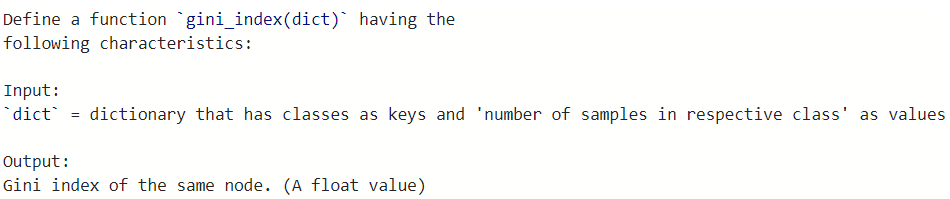

In [25]:
import numpy as np
def gini_index(dict):
    n = sum(dict.values())
    p_sum = 0
    for value in dict.values():
        p_sum = p_sum  +  (value / n ) * (value / n ) 
    gini = 1 - p_sum
    return gini

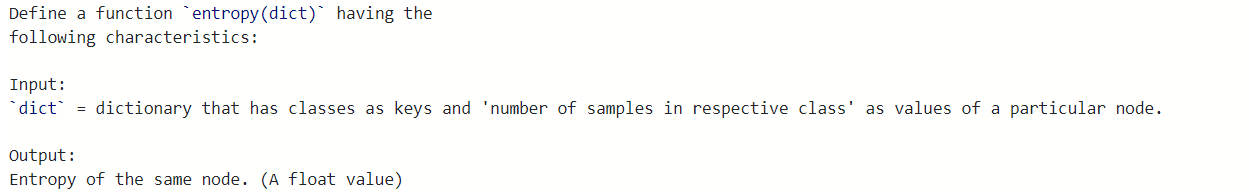

In [26]:
import numpy as np
def entropy(dict):
    n = sum(dict.values())
    p = 0
    for value in dict.values():
        p += -(value/n)*np.log2(value/n)
    return p

Consider a regression problem using CART. If y is a ndarray of targets of the samples in a particular node, define a function `sseloss(y)` that returns the error associated with that node.

In [27]:
import numpy as np
def sseloss(y):
    mean = np.average(y)
    loss = np.sum((y - mean) ** 2)
    return loss

#### Week-10

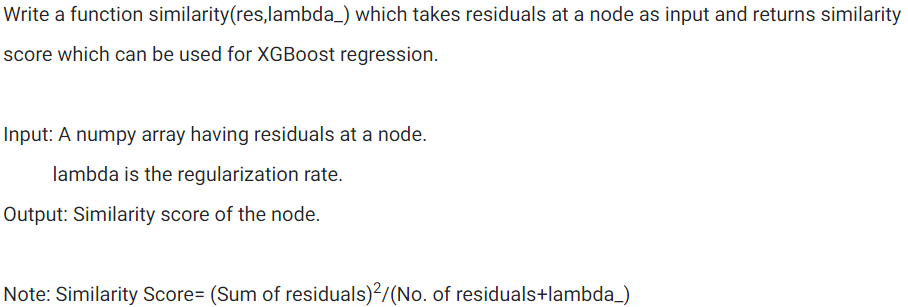

In [28]:
import numpy as np
def similarity(res,lambda_):
    return np.sum(res) ** 2 / (len(res) + lambda_)

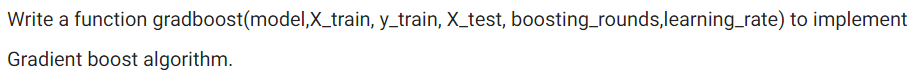

In [29]:
import numpy as np
import pandas as pd
def gradboost(model, X_train, y_train, X_test, boosting_rounds, learning_rate=0.1):
    y_hat_train = np.repeat(np.mean(y_train), len(y_train))
    y_hat_test = np.repeat(np.mean(y_train), len(X_test))
    
    residuals = y_train - y_hat_train
    
    for i in range(boosting_rounds):
        model = model.fit(X_train, residuals)
        y_hat_train += learning_rate * model.predict(X_train)
        y_hat_test += learning_rate * model.predict(X_test)
        residuals = y_train - y_hat_train
    return y_hat_train, y_hat_test

Above code when submitted gives error 'squared error'.  This is because of the mismatch in the scikit-learn version.  See https://discourse.onlinedegree.iitm.ac.in/t/while-trying-to-fit-into-decisiontreeregressor-i-get-keyerror-squared-error/37509/6 for more details

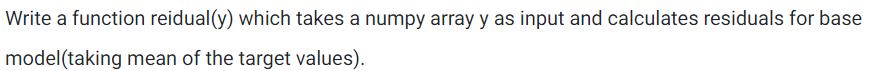

In [30]:
import numpy as np
def residual(y):
    y_hat = np.repeat(np.mean(y), len(y))
    return y - y_hat

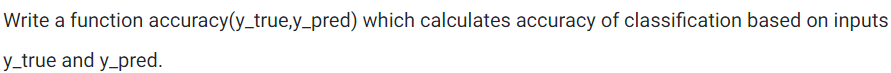

In [31]:
import numpy as np
def accuracy(y_true,y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

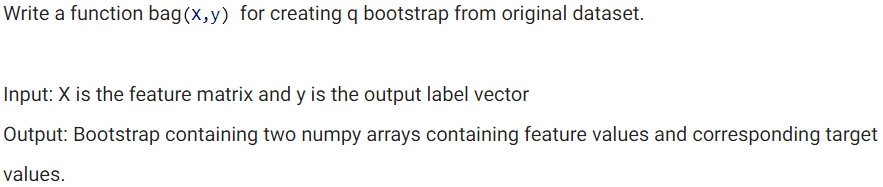

In [32]:
import numpy as np
def bag(X,y):
    n_samples = X.shape[0]
    np.random.seed(42)
    indices = np.random.choice(n_samples, size = n_samples, replace=True)
    return X[indices], y[indices]

#### Week-11

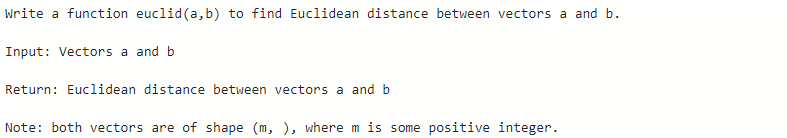

In [33]:
import numpy as np
def euclid(a, b):
    E = np.sqrt(np.sum((a - b) ** 2, axis=0))
    return E

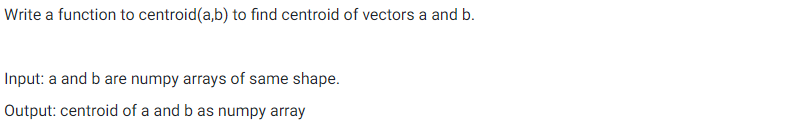

In [34]:
import numpy as np
def centroid(a,b):
    c = []
    count = a.shape[0]
    for i in range(count):
        c.append((a[i] + b[i]) / 2)
    return np.array(c)

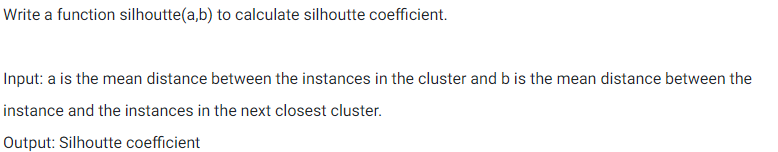

In [35]:
def silhouette(a, b):
  s = (a - b) / max(a, b)
  return s